In [9]:
# !pip install cv2
# !pip install opencv-python


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


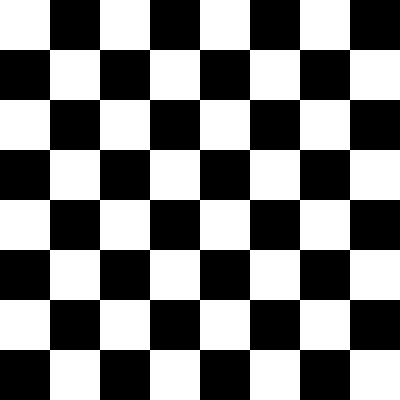

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [4]:
#1
import numpy as np
import cv2
from IPython.display import Image, display

# Đặt kích thước của 1 ô trên bàn cờ 
square_size = 50 # pixels

# Tạo một mảng 2x2 toàn 0
tile = np.zeros((2 * square_size, 2 * square_size), dtype=np.uint8)
tile[:square_size, :square_size] = 255  # top-left white square
tile[square_size:, square_size:] = 255  # bottom-right white square

# Tạo bàn cờ 8x8 bằng cách lăp lại mảng tile 4 lần theo chiều ngang và 4 lần chiều dọc  
chessboard = np.tile(tile, (4, 4))

cv2.imwrite('chessboard.png', chessboard)  # Save the image
display(Image('chessboard.png'))   
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
#2
import cv2

# Đọc ảnh
image_path = "team.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sử dụng hàm cv2.bitwise_not() để đảo ngược màu ảnh
inverted_image = cv2.bitwise_not(image)

# cv2.imshow('Original Image', image)
cv2.imwrite('Original Image', chessboard)  # Save the image
display(Image('Original Image'))   
# cv2.imshow('Inverted Image', inverted_image)
cv2.waitKey(0)
# cv2.destroyAllWindows()

# Lưu ảnh sau khi đảo
cv2.imwrite("team.jpg", inverted_image)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
#3
import cv2
import numpy as np
import math

# Đọc ảnh
image_path = r'C:\Users\DELL USER\Downloads\thotran.jpg'
image = cv2.imread(image_path)

# Lấy kích thước ảnh (cao + rộng)
(h, w) = image.shape[:2]

# Góc xoay
angle = 180
# Chuyển từ độ sang radian
angle_rad = math.radians(angle)

# Tính tâm của ảnh bằng cách chia rộng cho 2 và cao cho 2
cx, cy = w // 2, h // 2

# Tạo một mảng rỗng cho ảnh xoay có cùng kích thước và kiểu với ảnh được đọc
rotated_image = np.zeros_like(image)

# Sử dụng vòng lặp for để xoay ảnh
for y in range(h):
    for x in range(w):
        # Tinh tạo độ mới bằng công thức của phép xoay quanh tâm I(a,b)
        # x' = (x-a) * cos(θ) - (y-b) * sin(θ) + a
        # y' = (x-a) * sin(θ) + (y-b) * cos(θ) + b
        new_x = int((x - cx) * math.cos(angle_rad) - (y - cy) * math.sin(angle_rad) + cx)
        new_y = int((x - cx) * math.sin(angle_rad) + (y - cy) * math.cos(angle_rad) + cy)

        # Kiểm tra xem vị trí mới có nằm trong phạm vi của ảnh không
        if 0 <= new_x < w and 0 <= new_y < h:
            rotated_image[new_y, new_x] = image[y, x]
            
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lưu ảnh sau khi xoay
cv2.imwrite(r'C:\Users\DELL USER\Downloads\thotran_rotated.jpg', rotated_image)


True

In [ ]:
#4
import cv2
import numpy as np

# Đọc ảnh
image_path = r'C:\Users\DELL USER\Downloads\thotran.jpg'
image = cv2.imread(image_path)

# Đổi sang ảnh xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng phương pháp ngưỡng để tạo ảnh nhị phân
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Tìm viền của các đối tượng
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tạo ảnh rỗng để vẽ viền
contour_image = np.zeros_like(image)

# Vẽ viền
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# cv2.imshow('Original Image', image)
# cv2.imshow('Binary Image', binary_image)
cv2.imshow('Contours', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lưu ảnh
cv2.imwrite(r'C:\Users\DELL USER\Downloads\thotran_contours.jpg', contour_image)

# Ngáo

True

In [ ]:
#5
import cv2
import numpy as np

# Đọc ảnh
image_path = r'C:\Users\DELL USER\Downloads\thotran.jpg'
image = cv2.imread(image_path)

# Gán độ dày và dài của đường thẳng
line_thickness = 50
line_length = 80   

# Vẽ đường thẳng 
for i in range(line_thickness):
    for j in range(line_length):
        image[i, j] = [0, 0, 0]  # gán màu đen 

# # Draw a vertical black line
# for i in range(line_length):
#     for j in range(line_thickness):
#         image[i, j] = [0, 0, 0]  # Set the pixel to black

cv2.imshow('Image with Black Line', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Luư ảnh
cv2.imwrite(r'C:\Users\DELL USER\Downloads\thotran_with_black_line.jpg', image)


True

In [ ]:
#6
import numpy as np
import cv2

# Định nghĩa kích thước
height = 256  
width = 256  

# Tạo ảnh rỗng bằng mảng toàn 0
gradient_image = np.zeros((height, width), dtype=np.uint8)

# Tô màu từ trắng đến đen
for i in range(height):
    gradient_value = int((i / height) * 255)  # Tính gradient
    gradient_image[i, :] = gradient_value     # Gán gradient vừa tính cho các pixel trong hàng

cv2.imshow('White to Black Gradient', gradient_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lưu ảnh
cv2.imwrite('white_black_gradient.jpg', gradient_image)


True

In [ ]:
#7
import numpy as np
import cv2

# Step 1: Create a blank canvas
canvas_height = 200
canvas_width = 200
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Step 2: Draw the letter "B"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 5
font_thickness = 10
text = "B"
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_x = (canvas_width - text_size[0]) // 2
text_y = (canvas_height + text_size[1]) // 2

cv2.putText(canvas, text, (text_x, text_y), font, font_scale, (255, 255, 255), font_thickness)

# Step 3: Display the image
cv2.imshow('Letter B', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Ngáo

In [ ]:
#8
import cv2 
  
# reading the images 
circle = cv2.imread('pic1.png') 
star = cv2.imread('pic2.png') 
  
# subtract the images 
subtracted = cv2.subtract(star, circle) 
  
# TO show the output 
cv2.imshow('image', subtracted) 
  
# To close the window 
cv2.waitKey(0) 
cv2.destroyAllWindows()
# Ngáo